In [30]:
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [31]:
# Finding the R^2 value of our curve fitting prediction
# Found here: https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit

def findR2(fun, x, y, popt):
    
    residuals = y - fun(x, *popt)

    ss_res = np.sum(residuals**2)

    ss_tot = np.sum((y - np.mean(y))**2)

    return 1 - (ss_res/ss_tot)

# Our function!

def expFunc(x, a, b):
    
    return a*x**b  

In [36]:
# Declare file path and convention here

###

zip_code = '15090'

###

s1 = 'E:/Old Downloads Folder/Research Stuff/Jupyter Notebooks/Coords Folder/'

s2 = '/' + zip_code + '_'

# This finds the initial step, stopping point, and step size of the files in your directory

total_steps = 0

i = 0

first_file = False

final = 0

with os.scandir(s1 + zip_code) as entries:
    
    bad_strings = [zip_code, '_', '.txt']
    
    for entry in entries:
        
        file_name = entry.name
        
        for string in bad_strings:
            
            file_name = file_name.replace(string, '')
        
        if float(file_name) > final:
            
            final = float(file_name)
            
        if first_file == False:
            
            i = float(file_name)
            
            first_file = True
    
        total_steps += 1

step = round((final - i)/(total_steps - 1), 5)

# Access the scale file of your zip code to find the Ovito -> Real world scale

scale = 0

openpath = s1 + zip_code + '_scale.txt'

with open(openpath) as f:
    
    f = f.read()
    
    scale = re.sub('[^0-9]', '', f)

# Create the dataframe that will hold our results

column_names = ['Ovito Range', 'coeff', 'exp', 'R2']

final_frame = pd.DataFrame(columns = column_names)

# The loop that does everything yeet

while i <= final:
    
    # I could not figure out how to intelligently round the numbers so make sure to check this before running!!
    
    i = round(i, 5)
    
    openpath = s1 + zip_code + s2 + str(i) + '.txt'
    
    with open(openpath) as file:
    
        data = pd.read_csv(file, sep = ',', names = ['Size'], skiprows = [0])
    
    data.index = data.index + 1
    
    data = data.reset_index()
    
    xdata = data['index']
    
    ydata = data['Size']
    
    variables, covariance = curve_fit(expFunc, xdata, ydata)
    
    temp_df = pd.DataFrame([[i, variables[0], variables[1], findR2(expFunc, xdata, ydata, variables)]], columns = column_names)
    
    final_frame = final_frame.append(temp_df, ignore_index = True)
    
    i += step
    
final_frame

,Ovito Range,coeff,exp,R2
0,0.010,1.255451,-0.027496,0.080336
1,0.011,1.647386,-0.060527,0.140656
2,0.012,2.276595,-0.100245,0.190222
3,0.013,2.961938,-0.132771,0.263416
4,0.014,3.975627,-0.169467,0.336018
...,...,...,...,...
159,0.169,2915.570265,-1.156097,0.968913
160,0.170,2921.265345,-1.156812,0.969050
161,0.171,2921.359498,-1.156338,0.969004
162,0.172,2921.302908,-1.155553,0.969145


[Text(0, 0.5, 'Exponent'), Text(0.5, 0, 'Cluster Radius (ft)')]

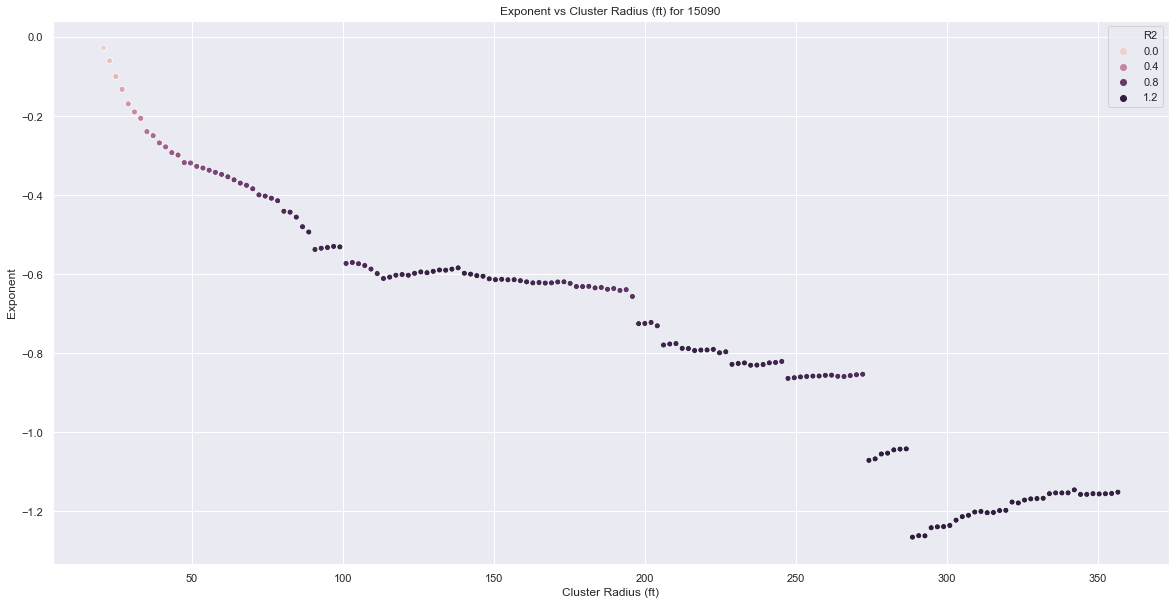

In [37]:
sns.set(rc={'figure.figsize':(20, 10)})

zip_dist = sns.scatterplot(x = final_frame['Ovito Range'] * int(scale), y = final_frame.exp, hue = final_frame.R2)

zip_dist.set_title('Exponent vs Cluster Radius (ft) for ' + str(zip_code))

zip_dist.set(ylabel = 'Exponent', xlabel = 'Cluster Radius (ft)')

In [38]:
# This saves the figure that's generated

fig = zip_dist.get_figure()

fig.savefig('Pictures and Figures/' + zip_code + '_dist.png')